# **Machine Learning Project**:

## **Stock Market Prediction And Forecasting Using Stacked LSTM**

### by- Soumyajit Das
◼ Editor used- **Google Colab**



*   [LinkedIn](https://www.linkedin.com/in/soumyajit-das-40a1851b8/)
*   [Github](https://github.com/Soumyajit9696)

▶ At first we upload the dataset in google colab, then we laod the data.The dataset is -[Dataset](https://raw.githubusercontent.com/mwitiderrick/stockprice/master/NSE-TATAGLOBAL.csv)




In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
df = pd.read_csv('Stock_prediction_Dataset.csv')
df.head()

,Date,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
0,2018-09-28,234.05,235.95,230.20,233.50,233.75,3069914,7162.35
1,2018-09-27,234.55,236.80,231.10,233.80,233.25,5082859,11859.95
2,2018-09-26,240.00,240.00,232.50,235.00,234.25,2240909,5248.60
3,2018-09-25,233.30,236.75,232.00,236.25,236.10,2349368,5503.90
4,2018-09-24,233.55,239.20,230.75,234.00,233.30,3423509,7999.55


In [6]:
df.describe()

,Open,High,Low,Last,Close,Total Trade Quantity,Turnover (Lacs)
count,2035.000000,2035.000000,2035.000000,2035.000000,2035.00000,2.035000e+03,2035.000000
mean,149.713735,151.992826,147.293931,149.474251,149.45027,2.335681e+06,3899.980565
std,48.664509,49.413109,47.931958,48.732570,48.71204,2.091778e+06,4570.767877
min,81.100000,82.800000,80.000000,81.000000,80.95000,3.961000e+04,37.040000
25%,120.025000,122.100000,118.300000,120.075000,120.05000,1.146444e+06,1427.460000
50%,141.500000,143.400000,139.600000,141.100000,141.25000,1.783456e+06,2512.030000
75%,157.175000,159.400000,155.150000,156.925000,156.90000,2.813594e+06,4539.015000
max,327.700000,328.750000,321.650000,325.950000,325.75000,2.919102e+07,55755.080000


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2035 entries, 0 to 2034
Data columns (total 8 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Date                  2035 non-null   object 
 1   Open                  2035 non-null   float64
 2   High                  2035 non-null   float64
 3   Low                   2035 non-null   float64
 4   Last                  2035 non-null   float64
 5   Close                 2035 non-null   float64
 6   Total Trade Quantity  2035 non-null   int64  
 7   Turnover (Lacs)       2035 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 127.3+ KB


In [8]:
df.isnull().sum()

Date                    0
Open                    0
High                    0
Low                     0
Last                    0
Close                   0
Total Trade Quantity    0
Turnover (Lacs)         0
dtype: int64

In [9]:
duplicates = df.duplicated()
duplicates.value_counts()

False    2035
dtype: int64

<ipython-input-10-349ff937d028>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True)


<Axes: >

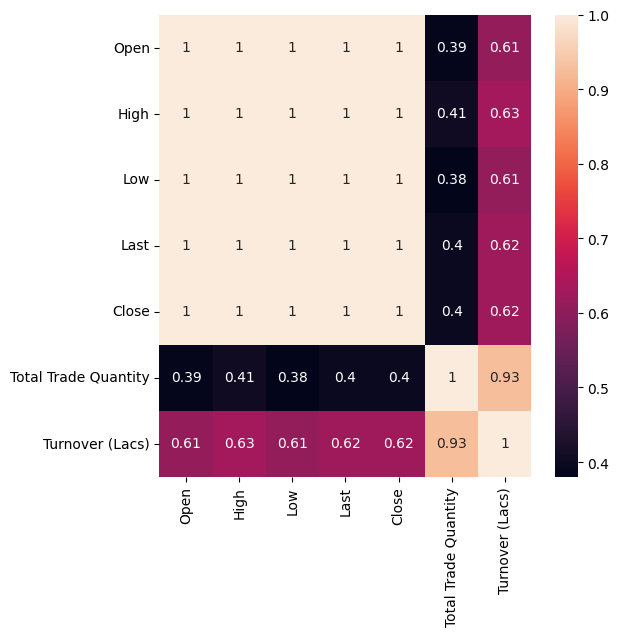

In [10]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True)

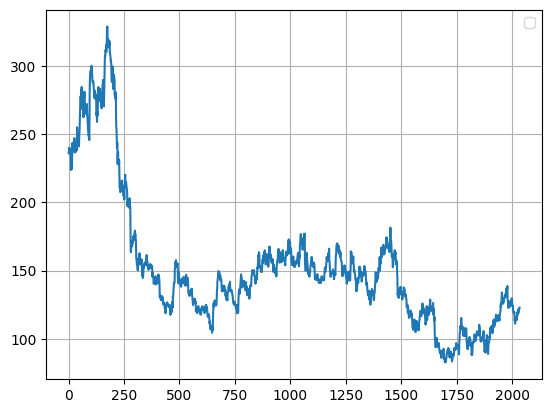

In [11]:
df_high=df.reset_index()['High']
plt.plot(df_high)
plt.grid()
plt.legend()

 We sepaeate the closing Values of the share and assign each with a index. and simply plot the graph to look at the fluctuation. From the graph we get the insight over time the prize of its share is decreasing.

## **Preprocessing the data**
LSTM are not robust to scale of the data, so we apply MinMax Scaler to transform our values in the range of 0 and 1.

In [12]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
df_high = scaler.fit_transform(np.array(df_high).reshape(-1,1))

In [13]:
df_high

array([[0.62268754],
       [0.62614353],
       [0.6391543 ],
       ...,
       [0.15917869],
       [0.15938199],
       [0.16344786]])

### **Training and Testing**

In [14]:
# Split the data into training and testing
training_size = int(len(df_high)*0.75)
test_size = len(df_high)- training_size
train_data, test_data = df_high[0:training_size,:],df_high[training_size:len(df_high),:1]

In [15]:
training_size, test_size

(1526, 509)

***Conversion of array values into dataset matrix***

In [16]:
#Conversion of array values into dataset matrix
def create_dataset(dataset, time_step=1):
  dataX, dataY = [], []
  for i in range(len(dataset)-time_step-1):
    a = dataset[i:(i+time_step), 0]
    dataX.append(a)
    dataY.append(dataset[i + time_step, 0])
  return np.array(dataX), np.array(dataY)

In [17]:
time_step = 100
x_train, y_train = create_dataset(train_data, time_step)
x_test, y_test = create_dataset(test_data, time_step)

***Reshape the input [samples, time steps, features] which is the requirement of LSTM***

In [18]:
# Reshaping of inputs
x_train = x_train.reshape(x_train.shape[0], x_train.shape[1], 1)
x_test = x_test.reshape(x_test.shape[0], x_test.shape[1], 1)

In [19]:
print(x_test.shape), print(y_train.shape)
print(x_test.shape), print(y_test.shape)

(408, 100, 1)
(1425,)
(408, 100, 1)
(408,)


(None, None)

 **After the data is scaled we train the data and test the data using the last 25% data that we stored in a another set using initial dataset.
Then we create stack LSTM model**

## **Making the LSTM model**

In [20]:
import tensorflow as tf
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense
from tensorflow.python.keras.layers import LSTM
# Creating the Stcked LSTM Model
model = Sequential()
model.add(LSTM(50, return_sequences = True, input_shape = (100,1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (None, 100, 50)           10400     
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                20200     
_________________________________________________________________
dense (Dense)                (None, 1)                 51        
Total params: 30,651
Trainable params: 30,651
Non-trainable params: 0
_________________________________________________________________


In [21]:
model.fit(x_train, y_train, validation_data = (x_test, y_test), epochs = 100, batch_size = 64, verbose = 1)


Epoch 1/100
23/23 [==============================] - 27s 380ms/step - loss: 0.0303 - val_loss: 0.0023
Epoch 2/100
23/23 [==============================] - 8s 358ms/step - loss: 0.0032 - val_loss: 0.0014
Epoch 3/100
23/23 [==============================] - 7s 298ms/step - loss: 9.6756e-04 - val_loss: 7.4930e-04
Epoch 4/100
23/23 [==============================] - 8s 361ms/step - loss: 8.4171e-04 - val_loss: 0.0011
Epoch 5/100
23/23 [==============================] - 8s 358ms/step - loss: 8.1690e-04 - val_loss: 0.0010
Epoch 6/100
23/23 [==============================] - 7s 298ms/step - loss: 7.9759e-04 - val_loss: 9.5903e-04
Epoch 7/100
23/23 [==============================] - 10s 433ms/step - loss: 7.8217e-04 - val_loss: 9.7551e-04
Epoch 8/100
23/23 [==============================] - 7s 296ms/step - loss: 7.6238e-04 - val_loss: 8.8575e-04
Epoch 9/100
23/23 [==============================] - 8s 358ms/step - loss: 7.5404e-04 - val_loss: 9.3258e-04
Epoch 10/100
23/23 [=====================

In [22]:
# Predictions
train_predict = model.predict(x_train)
test_predict = model.predict(x_test)

In [23]:
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

## **RMSE(Root Mean Square Error)**

In [24]:
import math
from sklearn.metrics import mean_squared_error
math.sqrt(mean_squared_error(y_train, train_predict))

165.50065771178086

In [25]:
math.sqrt(mean_squared_error(y_test, test_predict))

108.06829300908383

## **Plotting**

In [26]:
look_back = 100
trainPredictPlot = np.empty_like(df_high)
trainPredictPlot[:,:] = np.nan
trainPredictPlot[look_back:len(train_predict) + look_back, :] = train_predict

#  test predictions for plotting
testPredictPlot = np.empty_like(df_high)
testPredictPlot[:,:] = np.nan
testPredictPlot[len(train_predict) + (look_back * 2) +1:len(df_high) - 1, :] = test_predict

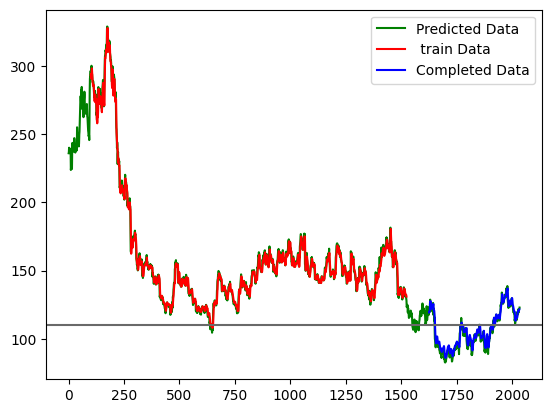

Green indicates the Predicted Data
Blue indicated the Completed Data
Red indicates the train Data


In [27]:
# Plotting the baseline and predictions
plt.plot(scaler.inverse_transform(df_high),c='green',label='Predicted Data')
plt.plot(trainPredictPlot,c='r',label=' train Data')
plt.plot(testPredictPlot,c='blue',label='Completed Data')
plt.legend()
plt.axhline(y=110,c='dimgrey')
plt.show()

print("Green indicates the Predicted Data")
print("Blue indicated the Completed Data")
print("Red indicates the train Data")

In [28]:
len(test_data), x_test.shape

(509, (408, 100, 1))

In [29]:
x_input = test_data[409:].reshape(1,-1)
x_input.shape

(1, 100)

In [30]:
temp_input = list(x_input)
temp_input = temp_input[0].tolist()

lst_output=[]
n_steps = 100
nextNumberOfDays =30
i=0

while(i<nextNumberOfDays):

  if(len(temp_input)>100):
     x_input = np.array(temp_input[1:])
     print("{} day input {}".format(i,x_input))
     x_input=x_input.reshape(1,-1)
     x_input = x_input.reshape((1, n_steps, 1))

     yhat = model.predict(x_input, verbose=0)
     print("{} day output {}".format(i,yhat))
     temp_input.extend(yhat[0].tolist())
     temp_input=temp_input[1:]

     lst_output.extend(yhat.tolist())
     i=i+1
  else:
      x_input = x_input.reshape((1, n_steps,1))
      yhat = model.predict(x_input, verbose=0)
      print(yhat[0])
      temp_input.extend(yhat[0].tolist())
      print(len(temp_input))
      lst_output.extend(yhat.tolist())
      i=i+1


print(lst_output)

[0.16360827]
101
1 day input [0.13254727 0.13397032 0.13356373 0.13498679 0.14108559 0.13498679
 0.12644847 0.12685505 0.12482212 0.14515145 0.1467778  0.15003049
 0.15368977 0.17198618 0.16548079 0.17625534 0.17564546 0.19129904
 0.20817239 0.20309006 0.18479366 0.17930474 0.1896727  0.17483228
 0.17849156 0.17645863 0.18540354 0.18377719 0.19190892 0.18987599
 0.19028258 0.19394186 0.20004066 0.19638138 0.19495832 0.20349665
 0.19597479 0.21162838 0.22036999 0.20979874 0.21528766 0.21589754
 0.21610083 0.22748526 0.19150234 0.1833706  0.17340923 0.16751372
 0.1622281  0.17056312 0.17462899 0.17930474 0.18174426 0.16853019
 0.16548079 0.1742224  0.1713763  0.17300264 0.17157959 0.17767839
 0.18459036 0.18702988 0.18987599 0.19109575 0.18581012 0.17015654
 0.16751372 0.16974995 0.16609067 0.15531612 0.15003049 0.15064037
 0.14860744 0.14596463 0.15043708 0.14413499 0.12441553 0.12827811
 0.11547062 0.12034966 0.13478349 0.13498679 0.12868469 0.13295385
 0.12807481 0.12624517 0.13051433

In [31]:
day_new = np.arange(1, 101)
day_pred = np.arange(101, 131)

In [32]:
day_new.shape


(100,)

In [33]:
day_pred.shape

(30,)

In [34]:
len(df_high)

2035

### *Graph of actual values in last 100 days*

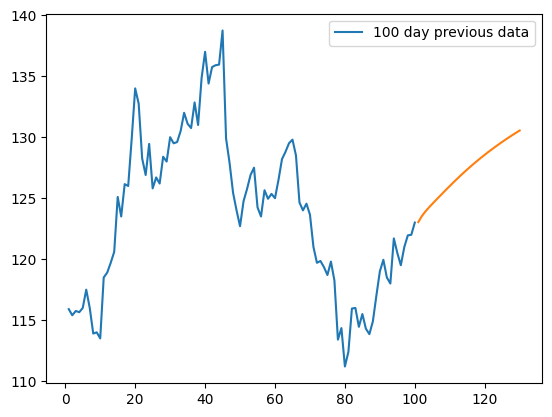

In [35]:
plt.plot(day_new, scaler.inverse_transform(df_high[1935:]),label='100 day previous data')
plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.legend()

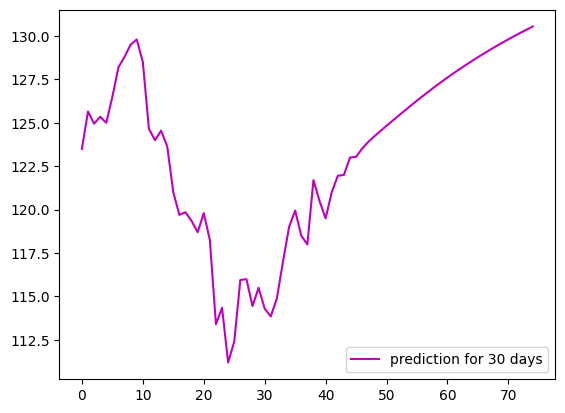

In [47]:
data_new = df_high.tolist()
data_new.extend(lst_output)
plt.plot(scaler.inverse_transform(data_new[1990:]),c='m',label='prediction for 30 days')
plt.legend()

In [48]:
#data_new =scaler.inverse_transform(data_new).tolist()
#plt.plot(data_new)

### **Total 131 days data merged graph**

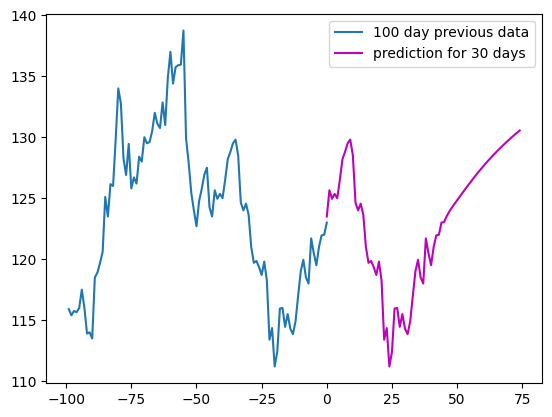

In [50]:
plt.plot(day_new-100, scaler.inverse_transform(df_high[1935:]),label='100 day previous data')
plt.plot(scaler.inverse_transform(data_new[1990:]),c='m',label='prediction for 30 days')
#plt.plot(day_pred, scaler.inverse_transform(lst_output))
plt.legend()



*   Finally we plot the graph for visual understanding of the data and how well our model is able to predict the data.
*   n the plotted curves we can see that the Trained Model almost accurately overlapes on the Real Dataset curve and the untrained Test Data is also fitting the curve quiet well . So in conclusion we can say that our model is quiet Successfully predicting the stock prizes.

